In [1]:
import os
from pathlib import Path

cwd = Path.cwd()
if cwd.name == "notebooks":
    os.chdir(cwd.parent)

In [2]:
import pandas as pd

dataset = 'iemocap'
df = pd.read_csv(f"outputs/test_runs/{dataset}.csv")

In [3]:
df

,model,dataset,fold,num_runs,prompt,valid_rate_mean,valid_rate_std,global_f1_macro_mean,global_f1_macro_std,global_f1_weighted_mean,...,language_English_classwise_negative_predictive_value_Sad_mean,language_English_classwise_negative_predictive_value_Sad_std,language_English_classwise_f1_score_Angry_mean,language_English_classwise_f1_score_Angry_std,language_English_classwise_f1_score_Happy_mean,language_English_classwise_f1_score_Happy_std,language_English_classwise_f1_score_Neutral_mean,language_English_classwise_f1_score_Neutral_std,language_English_classwise_f1_score_Sad_mean,language_English_classwise_f1_score_Sad_std
0,qwen2-audio,iemocap,1,5,simple,1.0,0.0,0.7035,0.0189,0.6847,...,0.9933,0.0043,0.8586,0.0296,0.7966,0.0123,0.5267,0.0345,0.6321,0.0250
1,qwen2-audio,iemocap,1,5,task,1.0,0.0,0.7015,0.0158,0.6789,...,0.9868,0.0026,0.8480,0.0126,0.7752,0.0296,0.5127,0.0443,0.6699,0.0339
2,qwen2-audio,iemocap,2,5,simple,1.0,0.0,0.7451,0.0095,0.7195,...,0.9942,0.0013,0.8697,0.0056,0.7898,0.0117,0.5966,0.0336,0.7245,0.0137
3,qwen2-audio,iemocap,2,5,task,1.0,0.0,0.7414,0.0100,0.7279,...,0.9899,0.0064,0.7943,0.0556,0.7835,0.0148,0.6438,0.0469,0.7439,0.0123
4,qwen2-audio,iemocap,3,5,simple,1.0,0.0,0.7200,0.0282,0.7124,...,0.9840,0.0016,0.8095,0.0173,0.7658,0.0297,0.5850,0.0398,0.7196,0.0321
5,qwen2-audio,iemocap,3,5,task,1.0,0.0,0.7111,0.0093,0.7062,...,0.9829,0.0029,0.7617,0.0098,0.7445,0.0254,0.5950,0.0110,0.7431,0.0231
6,qwen2-audio,iemocap,4,5,simple,1.0,0.0,0.6885,0.0307,0.7125,...,0.9966,0.0045,0.8434,0.0185,0.7999,0.0148,0.5010,0.0461,0.6098,0.0433
7,qwen2-audio,iemocap,4,5,task,1.0,0.0,0.6997,0.0112,0.7134,...,0.9919,0.0017,0.8039,0.0297,0.7748,0.0262,0.5513,0.0340,0.6689,0.0281
8,qwen2-audio,iemocap,5,5,simple,1.0,0.0,0.6901,0.0095,0.6853,...,0.9699,0.0022,0.7644,0.0217,0.7719,0.0032,0.5708,0.0146,0.6535,0.0166
9,qwen2-audio,iemocap,5,5,task,1.0,0.0,0.6780,0.0218,0.6872,...,0.9561,0.0122,0.6592,0.0676,0.7728,0.0071,0.6157,0.0052,0.6644,0.0430


In [6]:
list(df.columns)

['model',
 'dataset',
 'fold',
 'num_runs',
 'prompt',
 'valid_rate_mean',
 'valid_rate_std',
 'global_f1_macro_mean',
 'global_f1_macro_std',
 'global_f1_weighted_mean',
 'global_f1_weighted_std',
 'global_accuracy_unweighted_mean',
 'global_accuracy_unweighted_std',
 'global_accuracy_weighted_mean',
 'global_accuracy_weighted_std',
 'global_precision_macro_mean',
 'global_precision_macro_std',
 'global_precision_weighted_mean',
 'global_precision_weighted_std',
 'global_recall_macro_mean',
 'global_recall_macro_std',
 'global_recall_weighted_mean',
 'global_recall_weighted_std',
 'classwise_accuracy_Angry_mean',
 'classwise_accuracy_Angry_std',
 'classwise_accuracy_Happy_mean',
 'classwise_accuracy_Happy_std',
 'classwise_accuracy_Neutral_mean',
 'classwise_accuracy_Neutral_std',
 'classwise_accuracy_Sad_mean',
 'classwise_accuracy_Sad_std',
 'classwise_false_positive_rate_Angry_mean',
 'classwise_false_positive_rate_Angry_std',
 'classwise_false_positive_rate_Happy_mean',
 'classwis

#### Check the number of per-emotion columns

In [3]:
import re

columns = df.columns.tolist()
emotions = ['Angry', 'Neutral', 'Sad', 'Happy']

emotion_counts = {}
for emotion in emotions:
    pattern = re.compile(f'_{emotion}_', re.IGNORECASE)
    count = sum(1 for col in columns if pattern.search(col))
    emotion_counts[emotion] = count

assert len(set(emotion_counts.values())) == 1, "Column counts for emotions do not match!"

#### Count number of NaN values

In [4]:
# Count total NaN values in dataframe
total_nan = df.isnull().sum().sum()
print(f"Total NaN values: {total_nan}")

# Count NaN values excluding _std columns
cols_to_check = [col for col in df.columns if not col.endswith('_std')]
nan_no_std = df[cols_to_check].isnull().sum().sum()
print(f"NaN values (excluding _std): {nan_no_std}")

print("=== COLUMNS WITH NaN VALUES ===\n")
cols_to_check = [col for col in df.columns if not col.endswith('_std')]
nan_counts = df[cols_to_check].isnull().sum()
nan_counts = nan_counts[nan_counts > 0]

if len(nan_counts) > 0:
    for col, count in nan_counts.items():
        print(f"{col}: {count}/{len(df)} ({count/len(df)*100:.1f}%)")
else:
    print("No columns with NaN values")

Total NaN values: 0
NaN values (excluding _std): 0
=== COLUMNS WITH NaN VALUES ===

No columns with NaN values


In [5]:
# Check columns with NaN values (excluding _std columns)
print("=== COLUMNS WITH NaN VALUES ===\n")
cols_to_check = [col for col in df.columns if not col.endswith('_std')]
nan_counts = df[cols_to_check].isnull().sum()
nan_counts = nan_counts[nan_counts > 0]

if len(nan_counts) > 0:
    for col, count in nan_counts.items():
        print(f"{col}: {count}/{len(df)} ({count/len(df)*100:.1f}%)")
else:
    print("No columns with NaN values")

# Check rows with NaN values
print("\n=== ROWS WITH NaN VALUES ===")
rows_with_nan = df[cols_to_check].isnull().any(axis=1)
print(f"Rows with any NaN: {rows_with_nan.sum()}/{len(df)} ({rows_with_nan.sum()/len(df)*100:.1f}%)")

if rows_with_nan.any():
    print(f"Row indices: {df[rows_with_nan].index.tolist()}")

=== COLUMNS WITH NaN VALUES ===

No columns with NaN values

=== ROWS WITH NaN VALUES ===
Rows with any NaN: 0/18 (0.0%)


##### Check rows/cols with values close to 0

In [7]:
import numpy as np

threshold = 0.01
numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns if not col.endswith('_std')]
near_zero = df[numeric_cols].abs() < threshold

# Columns with near-zero values
print("=== COLUMNS WITH NEAR-ZERO VALUES ===\n")
col_counts = near_zero.sum()
for col, count in col_counts[col_counts > 0].items():
    print(f"{col}: {count}/{len(df)} ({count/len(df)*100:.1f}%)")

# Rows analysis
print("\n=== ROWS ANALYSIS ===")
all_zero = near_zero.all(axis=1)
mostly_zero = near_zero.sum(axis=1) / len(numeric_cols) > 0.5

print(f"All near-zero: {all_zero.sum()} rows {df[all_zero].index.tolist() if all_zero.any() else ''}")
print(f">50% near-zero: {mostly_zero.sum()} rows {df[mostly_zero].index.tolist() if mostly_zero.any() else ''}")

=== COLUMNS WITH NEAR-ZERO VALUES ===

classwise_false_positive_rate_Angry_mean: 11/18 (61.1%)
gender_Female_classwise_false_positive_rate_Angry_mean: 11/18 (61.1%)
gender_Female_classwise_false_positive_rate_Neutral_mean: 1/18 (5.6%)
gender_Male_classwise_false_positive_rate_Angry_mean: 11/18 (61.1%)
language_English_classwise_false_positive_rate_Angry_mean: 11/18 (61.1%)

=== ROWS ANALYSIS ===
All near-zero: 0 rows 
>50% near-zero: 0 rows 


## Compute Fairness

#### Statistical Parity, Equal Opportunity

In [83]:
import re
import numpy as np

def compute_fair_diff_row(row, sensitive_attr='gender', metric='classwise_accuracy', aggregation='mean'):
    """
    metrixs to fairness measure:
    - classwise_accuracy: Compute statistical parity for a single row across emotion classes.
    - classwise_true_positive_rate: Compute equal opportunity for a single row across emotion classes.
    - classwise_false_positive_rate: Compute equal non-opportunity for a single row across emotion classes.
    - classwise_positive_predictive_value: Compute predictive parity for a single row across emotion classes.
    - classwise_negative_predictive_value: Compute negative predictive parity for a single row across emotion classes.
    
    Returns the average absolute difference between groups for the given metric.
    """
    assert aggregation in ['mean', 'max'], "Aggregation must be 'mean' or 'max'"
    emotions = ['Angry', 'Neutral', 'Sad', 'Happy']
    
    disparities = []
    
    for emotion in emotions:
        pattern = f'^{sensitive_attr}_([^_]+)_{metric}_{emotion}_mean$'
        matching_cols = [col for col in row.index if re.match(pattern, col)]

        if len(matching_cols) >= 2:
            values = [row[col] for col in matching_cols]
            disparity = abs(values[0] - values[1])
            disparities.append(disparity)
    
    value = np.mean(disparities) if aggregation == 'mean' else np.max(disparities)
    return value

df_row = df.head(1)
statistical_parity_mean = df_row.apply(lambda row: compute_fair_diff_row(row, 'gender', 'classwise_accuracy', 'mean'), axis=1).tolist()
equal_opportunity_mean = df_row.apply(lambda row: compute_fair_diff_row(row, 'gender', 'classwise_true_positive_rate', 'mean'), axis=1).tolist()
equal_non_opportunity_mean = df_row.apply(lambda row: compute_fair_diff_row(row, 'gender', 'classwise_false_positive_rate', 'mean'), axis=1).tolist()
predictive_parity_mean = df_row.apply(lambda row: compute_fair_diff_row(row, 'gender', 'classwise_positive_predictive_value', 'mean'), axis=1).tolist()
negative_predictive_parity_mean = df_row.apply(lambda row: compute_fair_diff_row(row, 'gender', 'classwise_negative_predictive_value', 'mean'), axis=1).tolist()

statistical_parity_max = df_row.apply(lambda row: compute_fair_diff_row(row, 'gender', 'classwise_accuracy', 'max'), axis=1).tolist()
equal_opportunity_max = df_row.apply(lambda row: compute_fair_diff_row(row, 'gender', 'classwise_true_positive_rate', 'max'), axis=1).tolist()
equal_non_opportunity_max = df_row.apply(lambda row: compute_fair_diff_row(row, 'gender', 'classwise_false_positive_rate', 'max'), axis=1).tolist()
predictive_parity_max = df_row.apply(lambda row: compute_fair_diff_row(row, 'gender', 'classwise_positive_predictive_value', 'max'), axis=1).tolist()
negative_predictive_parity_max = df_row.apply(lambda row: compute_fair_diff_row(row, 'gender', 'classwise_negative_predictive_value', 'max'), axis=1).tolist()

print("=== MEAN AGGREGATION ===")
print(f"Statistical Parity (mean): {statistical_parity_mean}")
print(f"Equal Opportunity (mean): {equal_opportunity_mean}")
print(f"Equal Non-Opportunity (mean): {equal_non_opportunity_mean}")
print(f"Predictive Parity (mean): {predictive_parity_mean}")
print(f"Negative Predictive Parity (mean): {negative_predictive_parity_mean}")

print("\n=== MAX AGGREGATION ===")
print(f"Statistical Parity (max): {statistical_parity_max}")
print(f"Equal Opportunity (max): {equal_opportunity_max}")
print(f"Equal Non-Opportunity (max): {equal_non_opportunity_max}")
print(f"Predictive Parity (max): {predictive_parity_max}")
print(f"Negative Predictive Parity (max): {negative_predictive_parity_max}")

Max disparity for row 0 is 0.06919999999999993 for emotion Sad
Max disparity for row 0 is 0.19740000000000002 for emotion Neutral
Max disparity for row 0 is 0.06740000000000002 for emotion Sad
Max disparity for row 0 is 0.17260000000000003 for emotion Sad
Max disparity for row 0 is 0.040100000000000025 for emotion Angry
Max disparity for row 0 is 0.06919999999999993 for emotion Sad
Max disparity for row 0 is 0.19740000000000002 for emotion Neutral
Max disparity for row 0 is 0.06740000000000002 for emotion Sad
Max disparity for row 0 is 0.17260000000000003 for emotion Sad
Max disparity for row 0 is 0.040100000000000025 for emotion Angry
=== MEAN AGGREGATION ===
Statistical Parity (mean): [0.041874999999999996]
Equal Opportunity (mean): [0.07242499999999999]
Equal Non-Opportunity (mean): [0.029825]
Predictive Parity (mean): [0.07725]
Negative Predictive Parity (mean): [0.01949999999999999]

=== MAX AGGREGATION ===
Statistical Parity (max): [0.06919999999999993]
Equal Opportunity (max): [

In [76]:
df['statistical_parity_mean'] = df.apply(lambda row: compute_fair_diff_row(row, 'gender', 'classwise_accuracy', 'mean'), axis=1)
df['equal_opportunity_mean'] = df.apply(lambda row: compute_fair_diff_row(row, 'gender', 'classwise_true_positive_rate', 'mean'), axis=1)
df['statistical_parity_max'] = df.apply(lambda row: compute_fair_diff_row(row, 'gender', 'classwise_accuracy', 'max'), axis=1)
df['equal_opportunity_max'] = df.apply(lambda row: compute_fair_diff_row(row, 'gender', 'classwise_true_positive_rate', 'max'), axis=1)

In [114]:
import re
import numpy as np
import pandas as pd
from sklearn.base import defaultdict

def compute_fair_diff_row_with_emotion(row, sensitive_attr='gender', metric='classwise_accuracy'):
    """
    Compute fairness metric and return both the value and the emotion with max disparity.
    
    Returns: (metric_value, max_disparity_emotion)
    """
    emotions = ['Angry', 'Neutral', 'Sad', 'Happy']
    
    disparities = []
    
    for emotion in emotions:
        pattern = f'^{sensitive_attr}_([^_]+)_{metric}_{emotion}_mean$'
        matching_cols = [col for col in row.index if re.match(pattern, col)]

        if len(matching_cols) >= 2:
            values = [row[col] for col in matching_cols]
            disparity = abs(values[0] - values[1])
            disparities.append(disparity)
    
    return disparities

results = defaultdict(list)

for idx, row in df.iterrows():
    row_result = {
        'index': idx,
        'prompt': row['prompt'],
        'fold': row['fold']
    }
    
    row_result['sp'] = compute_fair_diff_row_with_emotion(row, 'gender', 'classwise_accuracy')
    row_result['eo'] = compute_fair_diff_row_with_emotion(row, 'gender', 'classwise_true_positive_rate')
    row_result['eno'] = compute_fair_diff_row_with_emotion(row, 'gender', 'classwise_false_positive_rate')
    row_result['pp'] = compute_fair_diff_row_with_emotion(row, 'gender', 'classwise_positive_predictive_value')
    row_result['npp'] = compute_fair_diff_row_with_emotion(row, 'gender', 'classwise_negative_predictive_value')
    
    results[row['model']].append(row_result)

# results

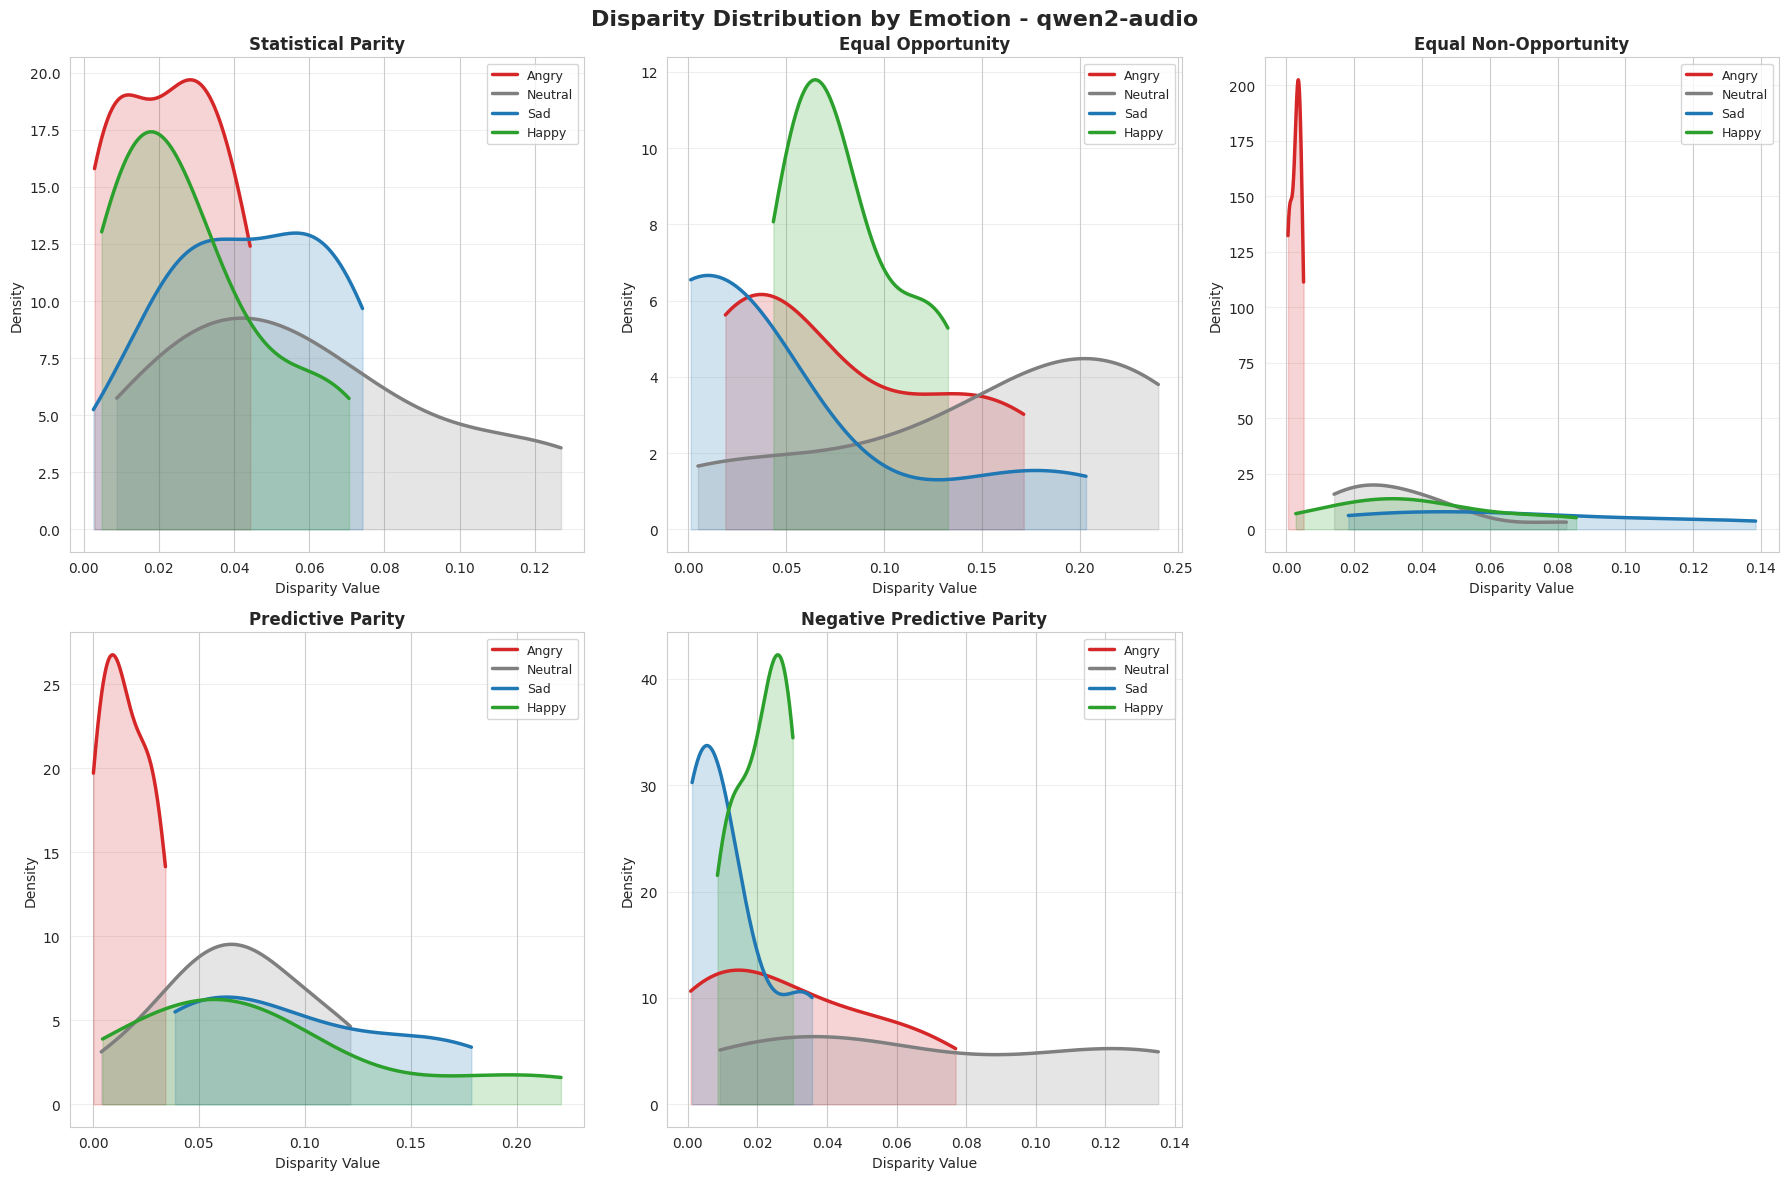

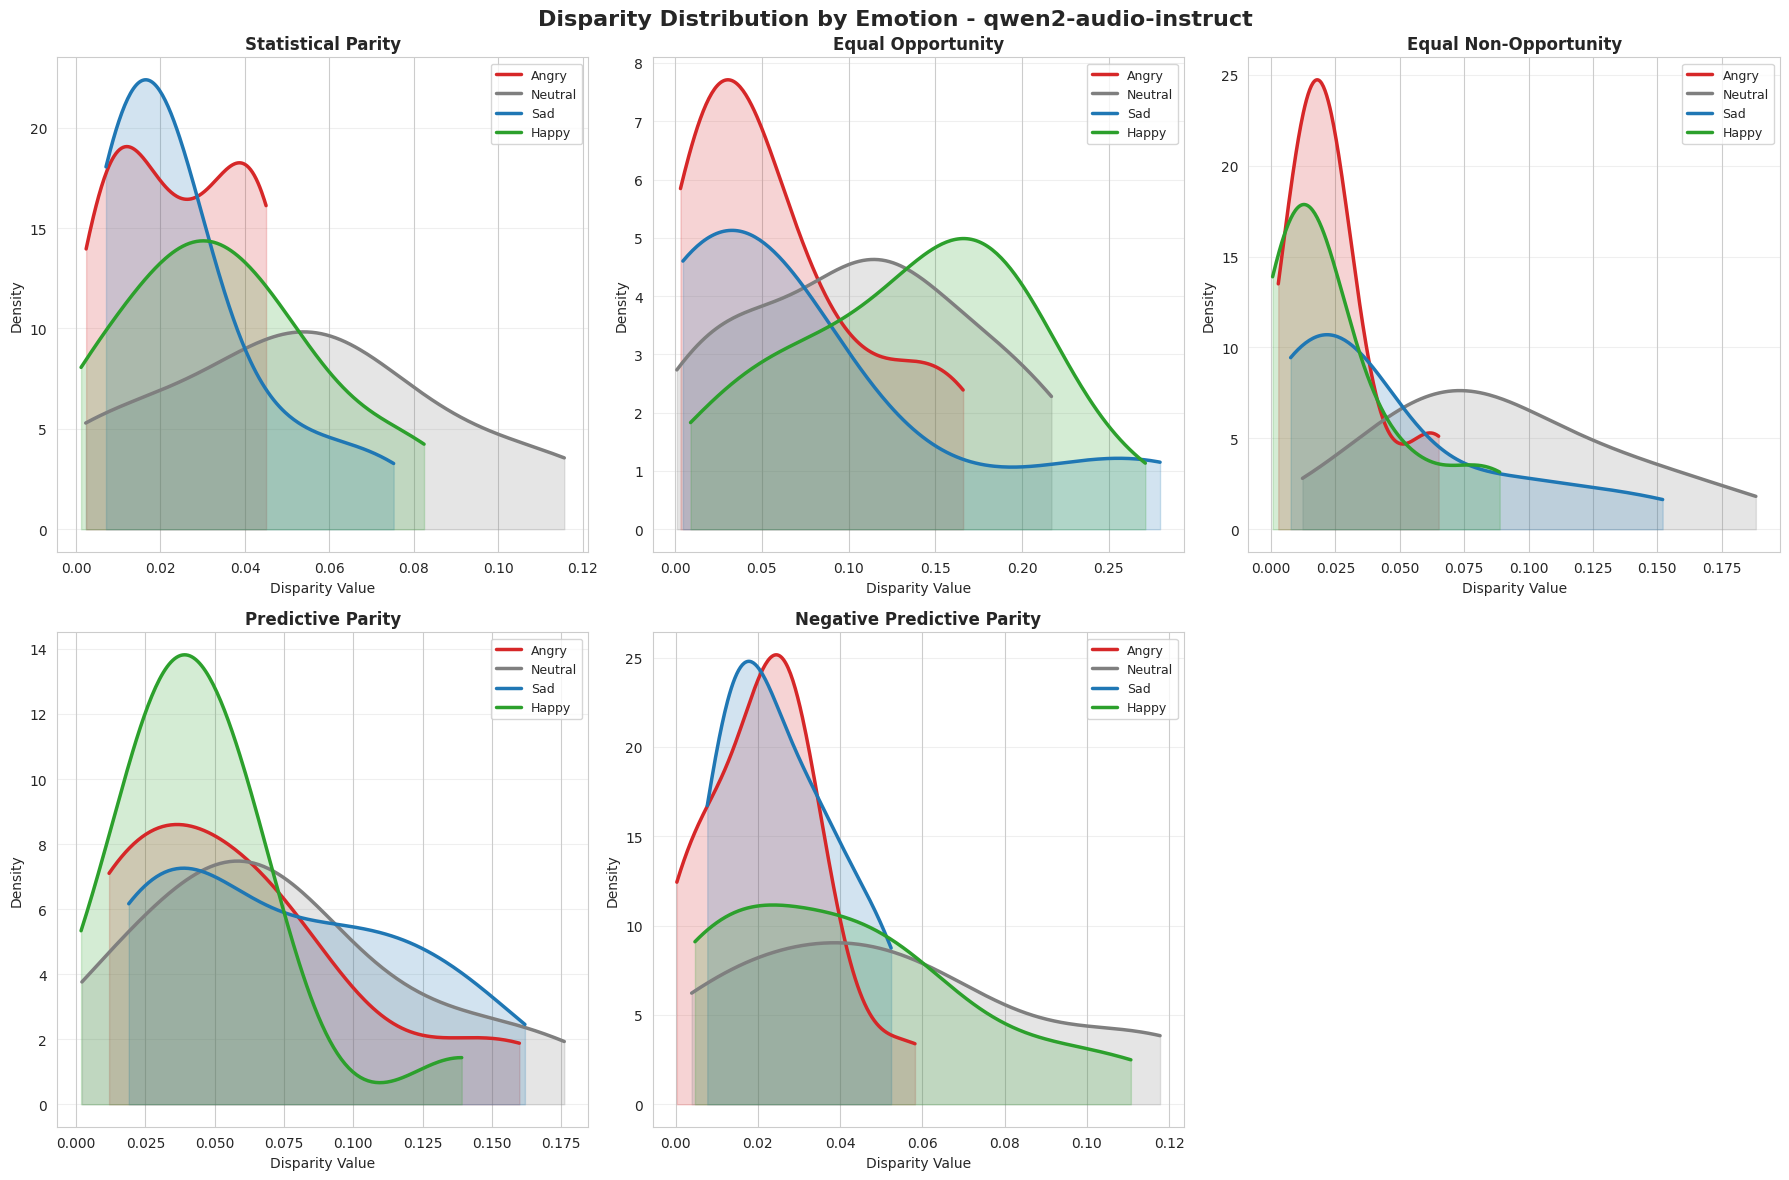

In [121]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Setup
emotions = ['Angry', 'Neutral', 'Sad', 'Happy']
emotion_colors = {'Angry': '#d62728', 'Neutral': '#7f7f7f', 'Sad': '#1f77b4', 'Happy': '#2ca02c'}
metrics = ['sp', 'eo', 'eno', 'pp', 'npp']
metric_names = {'sp': 'Statistical Parity', 'eo': 'Equal Opportunity', 'eno': 'Equal Non-Opportunity', 
                'pp': 'Predictive Parity', 'npp': 'Negative Predictive Parity'}

for model in df['model'].unique():
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(f'Disparity Distribution by Emotion - {model}', fontsize=16, fontweight='bold')
    axes = axes.flatten()
    
    for idx, metric in enumerate(metrics):
        ax = axes[idx]
        
        # Collect disparity values per emotion
        emotion_disparities = {emotion: [] for emotion in emotions}
        for result in results[model]:
            disparities = result[metric]
            if disparities and len(disparities) == 4:
                for emotion_idx, emotion in enumerate(emotions):
                    emotion_disparities[emotion].append(disparities[emotion_idx])
        
        # Plot KDE only
        for emotion in emotions:
            if emotion_disparities[emotion]:
                values = emotion_disparities[emotion]
                kde = stats.gaussian_kde(values)
                x_range = np.linspace(min(values), max(values), 200)
                ax.plot(x_range, kde(x_range), color=emotion_colors[emotion], 
                       linewidth=2.5, label=emotion)
                ax.fill_between(x_range, kde(x_range), alpha=0.2, color=emotion_colors[emotion])
        
        ax.set_title(metric_names[metric], fontsize=12, fontweight='bold')
        ax.set_xlabel('Disparity Value', fontsize=10)
        ax.set_ylabel('Density', fontsize=10)
        ax.legend(loc='upper right', fontsize=9)
        ax.grid(axis='y', alpha=0.3)
    
    axes[-1].remove()
    plt.tight_layout()
    plt.show()

#### Performance by fold

In [77]:
from IPython.display import display

pivot = df.pivot_table(
    values=['global_accuracy_unweighted_mean', 'global_f1_macro_mean'],
    index=['model', 'prompt'],
    columns='fold',
    aggfunc='mean'
)

pivot.index = [f'{model} - {prompt}' for model, prompt in pivot.index]
latex_table = pivot.to_latex(float_format="%.4f")
display(pivot.style.format("{:.4f}"))#.background_gradient(cmap='RdYlGn'))

#### Overall Performance

In [79]:
from IPython.display import display

pivot = df.pivot_table(
    values=['global_accuracy_unweighted_mean', 'global_f1_macro_mean', 'statistical_parity_max', 'equal_opportunity_max'],
    index=['model', 'prompt'],
    aggfunc='mean'
)

pivot.index = [f'{model} - {prompt}' for model, prompt in pivot.index]
latex_table = pivot.to_latex(float_format="%.4f")
display(pivot.style.format("{:.4f}"))

,equal_opportunity_max,global_accuracy_unweighted_mean,global_f1_macro_mean,statistical_parity_max
qwen2-audio - simple,0.1767,0.7347,0.7094,0.0726
qwen2-audio - task,0.2085,0.7255,0.7063,0.0669
qwen2-audio-instruct - direct,0.1544,0.7224,0.6967,0.0738
qwen2-audio-instruct - system_labels,0.1690,0.7709,0.6178,0.0608
qwen2-audio-instruct - user_labels,0.2009,0.7337,0.7048,0.0727
